In [289]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import leaves_list, linkage, dendrogram

import matplotlib.pyplot as plt

import seaborn as sn


In [290]:
gene_express = pd.read_csv('https://www.dropbox.com/s/hxjvua05abz8zqb/all_annotated.csv?dl=1')

In [291]:
gene_express.head()

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
0,FBtr0114258,CR41571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
1,FBtr0346770,CG45784,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
2,FBtr0302440,CR12798,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000
3,FBtr0302347,CR40182,23.712564,11.967821,20.767498,13.566818,18.802116,26.802691,22.819895,11.682728,21.894249,13.922059,16.482141,12.62268,31.800016,22.883186,14.330216,17.20257
4,FBtr0346769,CG45783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000


In [292]:
#select the dataset to genes with a median expression across samples of greater than 0
gene_express['median expression'] = gene_express.median(axis=1)

gene_express = gene_express[gene_express['median expression'] > 0]

#transform the data using the equation: log2(FPKM + 0.1)
gene_express_tranf = gene_express.apply(lambda x: np.log2(x+0.1) if np.issubdtype(x.dtype, np.number) else x)

In [293]:
gene_express_tranf

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median expression
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914,4.178105
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883,2.908499
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802,4.063295
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001,5.675952
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012,6.217169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673,6.168592
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730,7.725516
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787,10.902223
34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053,-2.985605


In [294]:
#clustering based on genes (rows)
linkage_df = gene_express_tranf.drop(columns=['t_name', 'gene_name', 'median expression'])
#Perform hierarchical/agglomerative clustering to get a linkage matrix
Z = linkage(linkage_df, 'ward')
#Get the index for rows clustered
row_index = leaves_list(Z)


In [295]:
row_index

array([4283, 5380,  242, ..., 1637, 3555, 7409], dtype=int32)

In [296]:
linkage_df.head()

,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D
3,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914
8,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883
9,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802
10,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001
11,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012


In [297]:
#clustering based on samples (columns)
sample_linkage_df = linkage_df.iloc[row_index, :].transpose()
#Perform hierarchical/agglomerative clustering to get a linkage matrix
Z_sample = linkage(sample_linkage_df, 'ward')
column_index = leaves_list(Z_sample)

In [298]:
#Get a new expresson cluster with rows (genes) and columns (samples) 
expression_cluster_df = linkage_df.iloc[row_index, column_index]
expression_cluster_df["gene_name"] = gene_express_tranf["gene_name"]
expression_cluster_df.set_index("gene_name", inplace = True)

In [299]:
expression_cluster_df

,male_12,female_12,male_10,female_10,male_11,female_11,male_14C,female_14C,male_14D,female_14D,male_14B,female_14B,male_14A,female_14A,male_13,female_13
gene_name,,,,,,,,,,,,,,,,
Ef1alpha48D,12.934721,12.686953,12.670183,12.722926,12.813750,12.867688,12.968766,13.162684,13.063854,13.033016,12.898895,12.985335,12.928335,12.983538,12.856987,12.944601
RpL41,12.433014,12.414387,12.250214,12.211794,11.247904,11.888512,13.315899,12.670927,12.957029,13.035814,12.852893,12.443481,12.830904,12.911454,12.560846,12.979426
alphaTub84B,10.722029,10.333407,10.329504,10.526979,10.934465,10.737289,11.855659,11.754094,11.984685,11.652179,11.681140,11.661965,11.067607,11.193248,10.743815,10.840464
RpL10Ab,10.795758,10.517779,10.417125,10.417446,10.493041,10.918809,11.800301,11.606854,11.672828,11.483158,11.906460,11.543012,11.390469,11.637179,10.674436,11.092437
RpS7,10.786691,10.476903,10.385360,10.580815,10.947841,11.164172,11.484327,11.452426,11.483044,11.189940,11.826114,11.616858,11.239565,11.213128,10.646758,11.211013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mino,4.676290,4.173244,4.368432,3.578029,3.734366,4.998784,-3.321928,0.459418,-3.321928,-3.321928,-3.321928,1.584866,1.022778,0.858330,2.414056,-3.321928
CG11807,5.112638,1.759061,2.571355,3.288537,3.362584,4.735950,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,3.239246,4.323013,3.078899,5.398089,-3.321928
LpR1,2.689639,2.323187,2.134276,3.084756,-3.321928,2.179521,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,2.819882,3.669078,1.169102,1.832952,-3.321928


<AxesSubplot:ylabel='gene_name'>

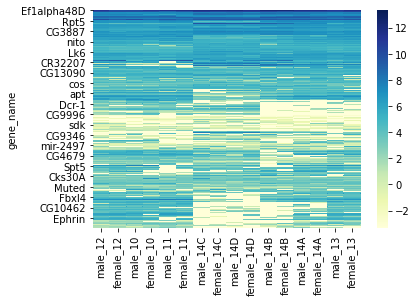

In [300]:
#Heatmap for gene expression
sn.heatmap(expression_cluster_df, cmap="YlGnBu")

## Heatmap for gene expression with dendrogram

/Users/cmdb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


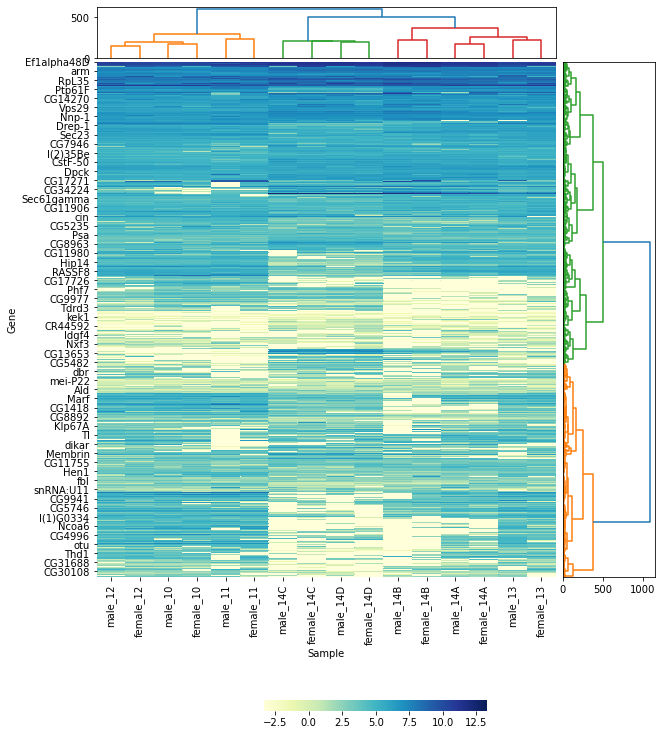

In [301]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid import make_axes_locatable


fig, ax = plt.subplots(
    figsize=(10,15))

sn.heatmap(expression_cluster_df, cmap="YlGnBu", cbar_kws={"shrink": 0.4, "orientation": "horizontal"}, ax = ax)
ax.set_xlabel('Sample')
ax.set_ylabel("Gene")

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="20%", pad=0.1)
dn = dendrogram(Z, orientation='right', no_labels=True)
ax.xaxis.set_visible(True)

ax1 = divider.append_axes("top", size="10%", pad=0.05)
dendrogram(Z_sample, orientation='top', no_labels=True)



fig.show()

/Users/cmdb/miniconda3/lib/python3.7/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1800x1800 with 0 Axes>

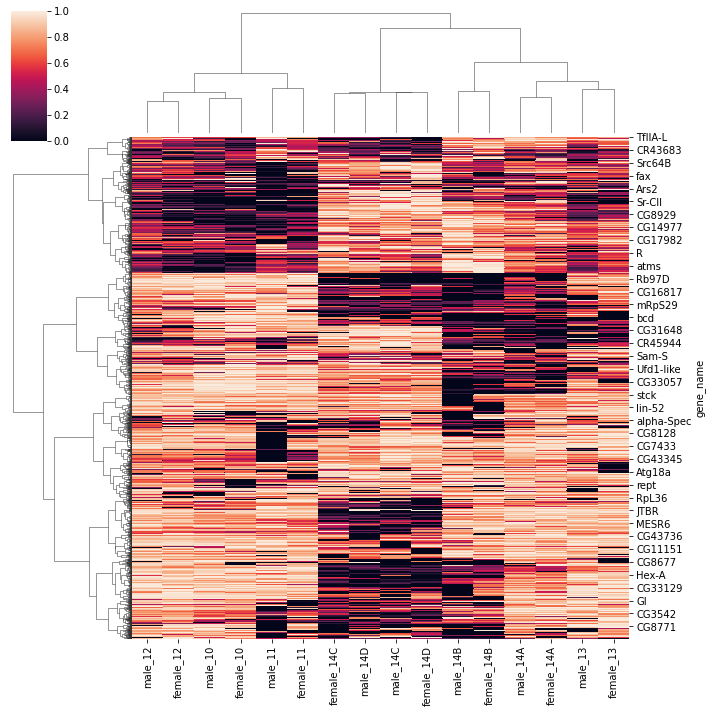

In [302]:
plt.figure(figsize=(25, 25))
# ax = plt.subplot()
sn.clustermap(expression_cluster_df, standard_scale=2, method="ward")
plt.show()

## Differential expression

In [303]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import statsmodels.stats as ss


In [389]:
#Construct a dataset that uses stages as independent variable
expression_stage_df = expression_cluster_df.reset_index()
# expression_stage_df = expression_stage_df.drop(expression_stage_df.columns[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]], axis = 1)


In [390]:
#New dataframe: 
ln_df = expression_cluster_df.transpose()

In [391]:
ln_df.shape

(16, 8613)

In [392]:
ln_df.reset_index()

gene_name,index,Ef1alpha48D,RpL41,alphaTub84B,RpL10Ab,RpS7,RpL40,RpLP1,RpL19,RpS3,...,Ddx1,CG15814,CG6659,CG6175,CG6175,mino,CG11807,LpR1,Aef1,Bsg25D
0,male_12,12.934721,12.433014,10.722029,10.795758,10.786691,10.925043,10.146646,11.104481,10.879865,...,4.188554,3.682020,5.163557,4.623679,3.726835,4.676290,5.112638,2.689639,3.914116,1.435840
1,female_12,12.686953,12.414387,10.333407,10.517779,10.476903,10.675340,10.811829,10.865963,10.510558,...,3.916664,3.651234,4.663733,4.894878,3.662939,4.173244,1.759061,2.323187,1.805650,1.815584
2,male_10,12.670183,12.250214,10.329504,10.417125,10.385360,10.668519,10.674791,10.939267,10.560062,...,4.558227,3.560807,4.492355,4.845394,3.842343,4.368432,2.571355,2.134276,1.946598,1.314652
3,female_10,12.722926,12.211794,10.526979,10.417446,10.580815,10.780999,9.866170,11.011475,10.680368,...,4.676911,4.769228,4.745526,4.099852,3.612598,3.578029,3.288537,3.084756,1.848539,2.319789
4,male_11,12.813750,11.247904,10.934465,10.493041,10.947841,10.762138,10.163007,10.290132,10.257773,...,-3.321928,3.356713,4.469402,4.872987,3.880417,3.734366,3.362584,-3.321928,1.025071,3.154587
5,female_11,12.867688,11.888512,10.737289,10.918809,11.164172,11.201229,10.287103,10.381554,10.334500,...,4.426211,1.783250,3.346759,4.985900,0.800117,4.998784,4.735950,2.179521,3.557844,2.114168
6,male_14C,12.968766,13.315899,11.855659,11.800301,11.484327,11.734484,11.764915,11.840680,11.651176,...,3.422568,3.382188,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928
7,female_14C,13.162684,12.670927,11.754094,11.606854,11.452426,11.635155,11.629619,11.727015,11.734381,...,3.848602,1.686245,2.755355,-3.321928,-3.321928,0.459418,-3.321928,-3.321928,-3.321928,-3.321928
8,male_14D,13.063854,12.957029,11.984685,11.672828,11.483044,11.672881,11.919716,11.853548,11.823398,...,4.131532,4.067966,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928
9,female_14D,13.033016,13.035814,11.652179,11.483158,11.189940,11.451718,11.402978,11.567572,11.458663,...,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928


In [393]:
# ln_df.rename(columns = {"gene_name": "sample"})
ln_df['stages'] = [12,12,10,10,11,11,14,14,14,14,14,14,14,14,13,13]
# ln_df['gender'] = ['male','female','male','female','male','female','male','female','male','female','male','female','male','female','male','female']
ln_df['gender'] = [0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1]

# ln_df.rename(columns=ln_df.iloc[0])
# ln_df.drop('gene_name', axis = 0)

In [394]:
ln_df.head(10)

gene_name,Ef1alpha48D,RpL41,alphaTub84B,RpL10Ab,RpS7,RpL40,RpLP1,RpL19,RpS3,RpL37a,...,CG6659,CG6175,CG6175,mino,CG11807,LpR1,Aef1,Bsg25D,stages,gender
male_12,12.934721,12.433014,10.722029,10.795758,10.786691,10.925043,10.146646,11.104481,10.879865,10.960023,...,5.163557,4.623679,3.726835,4.676290,5.112638,2.689639,3.914116,1.435840,12,0
female_12,12.686953,12.414387,10.333407,10.517779,10.476903,10.675340,10.811829,10.865963,10.510558,10.669371,...,4.663733,4.894878,3.662939,4.173244,1.759061,2.323187,1.805650,1.815584,12,1
male_10,12.670183,12.250214,10.329504,10.417125,10.385360,10.668519,10.674791,10.939267,10.560062,10.552226,...,4.492355,4.845394,3.842343,4.368432,2.571355,2.134276,1.946598,1.314652,10,0
female_10,12.722926,12.211794,10.526979,10.417446,10.580815,10.780999,9.866170,11.011475,10.680368,10.821011,...,4.745526,4.099852,3.612598,3.578029,3.288537,3.084756,1.848539,2.319789,10,1
male_11,12.813750,11.247904,10.934465,10.493041,10.947841,10.762138,10.163007,10.290132,10.257773,10.186321,...,4.469402,4.872987,3.880417,3.734366,3.362584,-3.321928,1.025071,3.154587,11,0
female_11,12.867688,11.888512,10.737289,10.918809,11.164172,11.201229,10.287103,10.381554,10.334500,11.251264,...,3.346759,4.985900,0.800117,4.998784,4.735950,2.179521,3.557844,2.114168,11,1
male_14C,12.968766,13.315899,11.855659,11.800301,11.484327,11.734484,11.764915,11.840680,11.651176,11.821058,...,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,14,0
female_14C,13.162684,12.670927,11.754094,11.606854,11.452426,11.635155,11.629619,11.727015,11.734381,11.754610,...,2.755355,-3.321928,-3.321928,0.459418,-3.321928,-3.321928,-3.321928,-3.321928,14,1
male_14D,13.063854,12.957029,11.984685,11.672828,11.483044,11.672881,11.919716,11.853548,11.823398,11.989318,...,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,14,0
female_14D,13.033016,13.035814,11.652179,11.483158,11.189940,11.451718,11.402978,11.567572,11.458663,11.497680,...,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,14,1


In [395]:
X = np.asarray(ln_df['stages'])
x_wConstant = sm.add_constant(X)
pval = []
for i in range(8613):
    y = ln_df.iloc[:,i]

    stage_ln = sm.OLS(y,x_wConstant).fit()
    
    pval.append(stage_ln.pvalues[1])


In [396]:
corrected_pvalue = list(ss.multitest.fdrcorrection(np.array(pval), alpha = 0.1)[1])


In [400]:
corrected_pvalue

[3.557395101748421e-11,
 3.557395101748421e-11,
 4.175297669756653e-11,
 2.255985117921953e-08,
 4.368830000178145e-08,
 8.777652753230104e-08,
 2.3363893721850655e-07,
 2.4573514385497064e-07,
 3.1449159290239747e-07,
 3.1449159290239747e-07,
 3.1449159290239747e-07,
 3.1449159290239747e-07,
 4.17938601972712e-07,
 4.25144657121785e-07,
 4.25144657121785e-07,
 5.631963490084563e-07,
 5.631963490084563e-07,
 5.631963490084563e-07,
 8.769113739152591e-07,
 9.52331739837796e-07,
 1.0503025871885145e-06,
 1.076680962427908e-06,
 1.2060268029912632e-06,
 1.290804941243624e-06,
 1.3705322002649957e-06,
 1.3792631832086922e-06,
 1.475979426841453e-06,
 1.7105545074777482e-06,
 2.049501969984627e-06,
 2.049501969984627e-06,
 2.1605499327137313e-06,
 2.1605499327137313e-06,
 2.5219049318917077e-06,
 2.5992845005734184e-06,
 2.6252935659923024e-06,
 2.8823645808253163e-06,
 3.551663691408695e-06,
 3.5553319129848975e-06,
 3.6026245863892663e-06,
 3.69635885228913e-06,
 3.69635885228913e-06,
 3.

/Users/cmdb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/Users/cmdb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


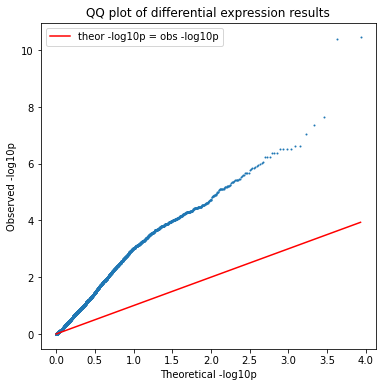

In [403]:
#Produce QQ plot for the p-values from the linear regressions
fig, ax = plt.subplots(
    figsize = (6,6)
)

p = corrected_pvalue
p.sort()

theoretical_p = np.arange(start=0,stop=1,step=1/8613)

ax.scatter(-np.log10(theoretical_p),-np.log10(p), s = 1)
ax.plot(-np.log10(theoretical_p),-np.log10(theoretical_p), color = "red", label = "theor -log10p = obs -log10p")
ax.set_title('QQ plot of differential expression results')
ax.set_ylabel("Observed -log10p")
ax.set_xlabel("Theoretical -log10p")

ax.legend()

plt.show()



## List of genes that exhibit differential expression by stage at a 10% false discovery rate

In [406]:
expression_stage_df['corrected_pvalue'] = corrected_pvalue


In [407]:
genes_10_FDR = expression_stage_df[expression_stage_df['corrected_pvalue'] < 0.1].gene_name.unique().tolist()


In [408]:
len(genes_10_FDR)

2889

In [409]:
print(genes_10_FDR)

['Ef1alpha48D', 'RpL41', 'alphaTub84B', 'RpL10Ab', 'RpS7', 'RpL40', 'RpLP1', 'RpL19', 'RpS3', 'RpL37a', 'RpL3', 'RpS4', 'EF2', 'RpS16', 'RpS9', 'RpL14', 'RpS6', 'RpL6', 'RpS24', 'RpL13A', 'RpL23', 'RpL8', 'RpL26', 'RpLP2', 'betaTub56D', 'RpL18A', 'sta', 'RpS15', 'Hsc70-4', 'RpL31', 'RpS27A', 'RpS25', 'RpS20', 'RpS19a', 'RpL5', 'RpS3A', 'eIF-5A', 'RpL39', 'RpS28b', 'RpL23A', 'RpL32', 'RpS26', 'RpL35A', 'RpL7A', 'Rack1', 'RpL29', 'RpL22', 'RpL7', 'His2Av', 'RpS23', 'RpS5b', 'Act5C', 'RpLP0', 'RpL28', 'RpS18', 'RpL18', 'RpS10b', 'RpL4', 'RpL17', 'RpS21', 'RpS12', 'RpL36', 'Df31', 'RpL21', 'RpS15Aa', 'tsr', 'RpS13', 'RpS8', 'RpL35', 'RpS30', 'FK506-bp2', 'RpL36A', 'eIF-4a', 'Tctp', 'Ef1gamma', 'RpL27', 'RpL27A', 'RpL37A', 'RpL13', 'RpL12', 'Rpt4', 'dUTPase', 'Fib', 'CG5941', 'Cisd2', 'AdSS', 'GstS1', 'snf', 'Prosbeta7', 'Snr1', 'CG1707', 'capt', 'Rab11', 'CG4390', 'CG3321', 'cl', 'GstO2', 'Prx3', 'Nxt1', 'ND42', 'CG14715', 'SmD2', 'SmF', 'Chrac-14', 'Clc', 'nop5', 'CG9953', 'ben', 'Non1', 

## Differential experession for gender

In [410]:
X = np.asarray(ln_df.loc[:,['stages','gender']])
x_wConstant = sm.add_constant(X)
pval2 = []
beta_sex = []
for i in range(8613):
    y = ln_df.iloc[:,i]
    stage_ln = sm.OLS(y,x_wConstant).fit()
    pval2.append(stage_ln.pvalues[1])

    beta_sex.append(np.asarray(stage_ln.params)[1])

In [421]:
corrected_pvalue2 = list(ss.multitest.fdrcorrection(np.array(pval2), alpha = 0.1)[1])



/Users/cmdb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  
/Users/cmdb/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


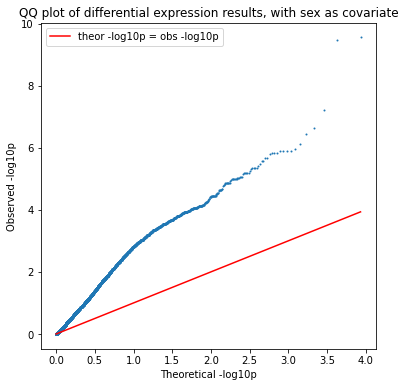

In [412]:
#Produce QQ plot for the p-values from the linear regressions
fig, ax = plt.subplots(
    figsize = (6,6)
)
p = corrected_pvalue2
p.sort()

ax.scatter(-np.log10(theoretical_p),-np.log10(p), s = 1)
ax.plot(-np.log10(theoretical_p),-np.log10(theoretical_p), color = "red", label = "theor -log10p = obs -log10p")
ax.set_title('QQ plot of differential expression results, with sex as covariate')
ax.set_ylabel("Observed -log10p")
ax.set_xlabel("Theoretical -log10p")
ax.legend()


plt.show()


In [423]:
expression_stage_df['corrected_pvalue2'] = corrected_pvalue2
expression_stage_df['beta_sex'] = beta_sex
genes_10_FDR_g = expression_stage_df[expression_stage_df['corrected_pvalue2'] < 0.1].gene_name.unique().tolist()


In [414]:
len(genes_10_FDR_g)

2793

In [415]:

print(genes_10_FDR_g)

['Ef1alpha48D', 'RpL41', 'alphaTub84B', 'RpL10Ab', 'RpS7', 'RpL40', 'RpLP1', 'RpL19', 'RpS3', 'RpL37a', 'RpL3', 'RpS4', 'EF2', 'RpS16', 'RpS9', 'RpL14', 'RpS6', 'RpL6', 'RpS24', 'RpL13A', 'RpL23', 'RpL8', 'RpL26', 'RpLP2', 'betaTub56D', 'RpL18A', 'sta', 'RpS15', 'Hsc70-4', 'RpL31', 'RpS27A', 'RpS25', 'RpS20', 'RpS19a', 'RpL5', 'RpS3A', 'eIF-5A', 'RpL39', 'RpS28b', 'RpL23A', 'RpL32', 'RpS26', 'RpL35A', 'RpL7A', 'Rack1', 'RpL29', 'RpL22', 'RpL7', 'His2Av', 'RpS23', 'RpS5b', 'Act5C', 'RpLP0', 'RpL28', 'RpS18', 'RpL18', 'RpS10b', 'RpL4', 'RpL17', 'RpS21', 'RpS12', 'RpL36', 'Df31', 'RpL21', 'RpS15Aa', 'tsr', 'RpS13', 'RpS8', 'RpL35', 'RpS30', 'FK506-bp2', 'RpL36A', 'eIF-4a', 'Tctp', 'Ef1gamma', 'RpL27', 'RpL27A', 'RpL37A', 'RpL13', 'RpL12', 'Rpt4', 'dUTPase', 'Fib', 'CG5941', 'Cisd2', 'AdSS', 'GstS1', 'snf', 'Prosbeta7', 'Snr1', 'CG1707', 'capt', 'Rab11', 'CG4390', 'CG3321', 'cl', 'GstO2', 'Prx3', 'Nxt1', 'ND42', 'CG14715', 'SmD2', 'SmF', 'Chrac-14', 'Clc', 'nop5', 'CG9953', 'ben', 'Non1', 

## Percentage overlap

In [416]:
overlap_list = [gene for gene in genes_10_FDR_g if gene in genes_10_FDR]
overlap_per = (len(overlap_list)/len(genes_10_FDR))*100

print('The overlap percentage is:', overlap_per,"%")

The overlap percentage is: 96.67705088265835 %


## Vocano plot of the differential expression, with sex as a covariate, results

In [417]:
from bioinfokit import analys, visuz

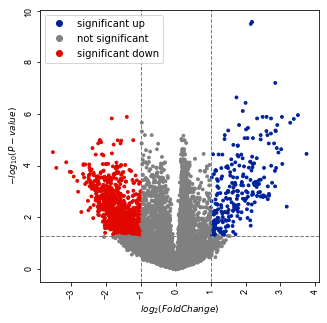

In [426]:

visuz.gene_exp.volcano(df=expression_stage_df, lfc='beta_sex', pv='corrected_pvalue2', color=("#00239CFF", "grey", "#E10600FF"),plotlegend=True, show=True, sign_line=True)
